<a href="https://colab.research.google.com/github/Qaiserfarooq285/FA25-AI/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALARY PREDICTION

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

## PART 1: Data Handling



In [ ]:


#Using method get current working directory (CWD) to find the dataset in the current directory
PATH = '/content/Salary_Data.csv'
#Now I use pandas to load the data and convert the csv into a dataframe
data = pd.read_csv(PATH)
#Using the head method to see the head of the dataframe
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# DATA Available from: https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

# **EDA**
EDA is the process of exploring and understanding a dataset before you jump into building ML models.

In [ ]:
#Describe method will provide an overview of the data
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Distribution of YearsExperience')

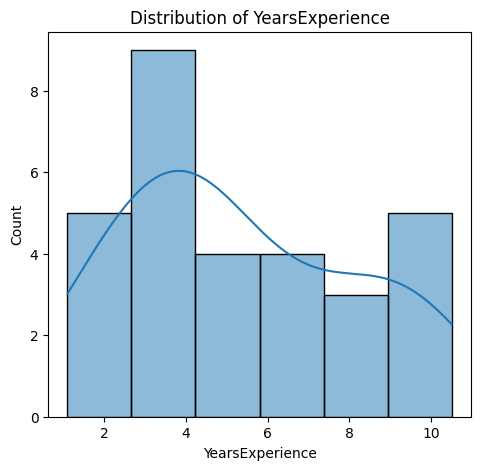

In [ ]:
# Univariate analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=data, x="YearsExperience", kde=True)
plt.title("Distribution of YearsExperience")



In [ ]:
# Analyze how closely the variables are related. The closer its value is to 1, the more variability the model explains.
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

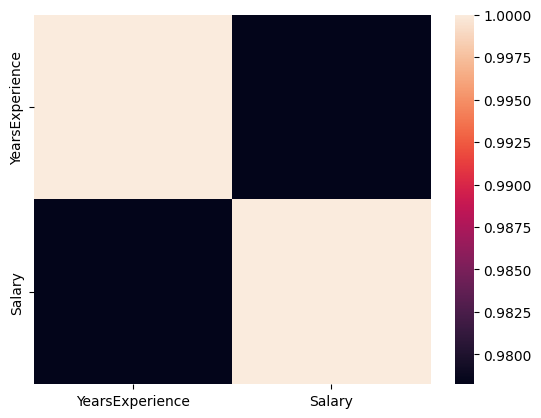

In [ ]:
# Using seaborn to make a heat graph
sns.heatmap(data.corr())

<Axes: xlabel='YearsExperience', ylabel='Salary'>

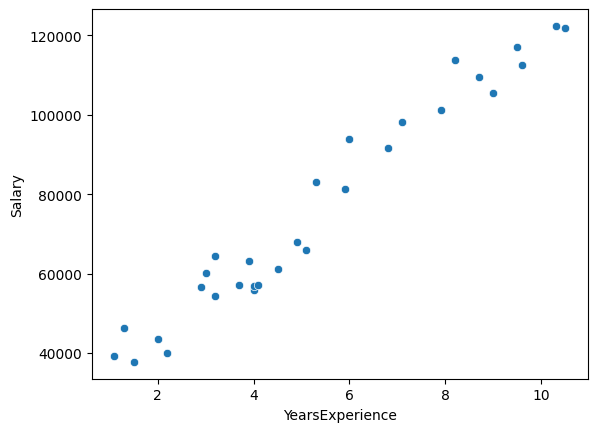

In [ ]:
# The first parameter calls the data, then the x and y
sns.scatterplot(data=data, x="YearsExperience",y="Salary")

### Linear Regression using Sklearn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suppose data is your DataFrame
X = data[["YearsExperience"]]
y = data["Salary"]  # or data[["Salary"]]

# Split into train & test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on test set
y_pred = lm.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)


print("R² on test set:", r2)


R² on test set: 0.9024461774180497


In [ ]:
# Creating a new column to place contents of the result variable
data["Prediction-Sklearn"]= result
data.head()

,YearsExperience,Salary,Prediction-Sklearn
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [ ]:
# Create a new column to show the error salary minus prediction (expected values)
data["Prediction Error-Sklearn"] = data["Salary"]-data["Prediction-Sklearn"]
data.head()

,YearsExperience,Salary,Prediction-Sklearn,Prediction Error-Sklearn
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


Text(0.5, 1.0, 'Linear Regression: Years of Experience & Corresponging Salary ')

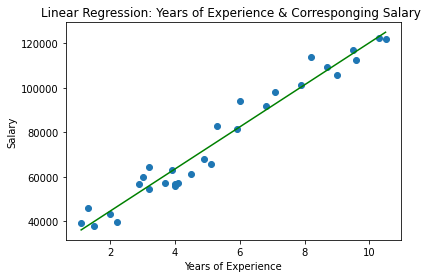

In [ ]:
# Plotting Linear Regression graph with Sklearn
plt.scatter(data["YearsExperience"], data["Salary"])
plt.plot(data["YearsExperience"],data["Prediction-Sklearn"], color="green")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience & Corresponging Salary ")

In [ ]:
 lm.coef_

array([[9449.96232146]])

In [ ]:
lm.intercept_

array([25792.20019867])

In [ ]:
# y = wo + w1*x
# Salary = 25792.20019867 + 9449.96232146 * YearsExperience

In [ ]:
#Testing for 9 years of experience
Salary = 25792.20019867 + 9449.96232146 * 9
Salary

110841.86109181

In [ ]:
lm.predict([[9]]) #colchetes pois exige-se 2D

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[110841.86109176]])